In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load data from the CSV file
data = pd.read_csv('data/email.csv')  # Replace with your CSV file
data.head()


,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


Classifier: RandomForestClassifier
Accuracy: 0.7647058823529411
Precision (spam): 1.0
Recall (spam): 0.3333333333333333
F1 Score (spam): 0.5


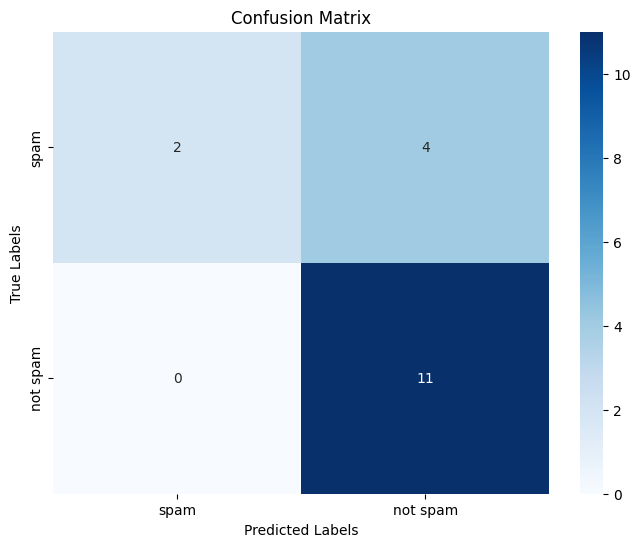

Classifier: SVC
Accuracy: 0.7058823529411765
Precision (spam): 1.0
Recall (spam): 0.16666666666666666
F1 Score (spam): 0.2857142857142857


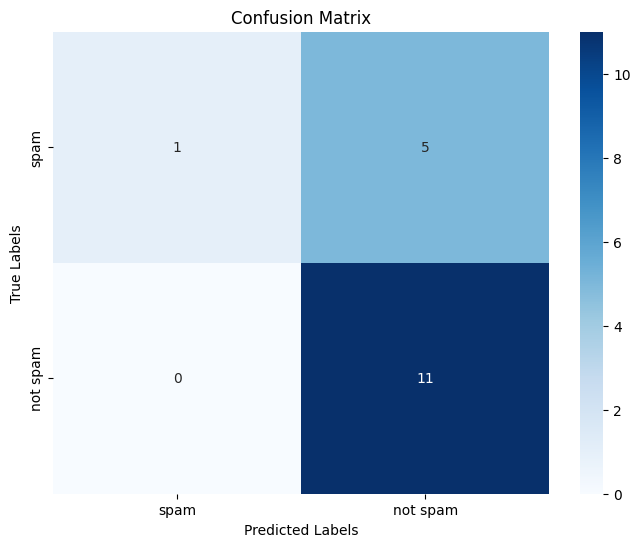

Classifier: GradientBoostingClassifier
Accuracy: 0.8235294117647058
Precision (spam): 0.8
Recall (spam): 0.6666666666666666
F1 Score (spam): 0.7272727272727272


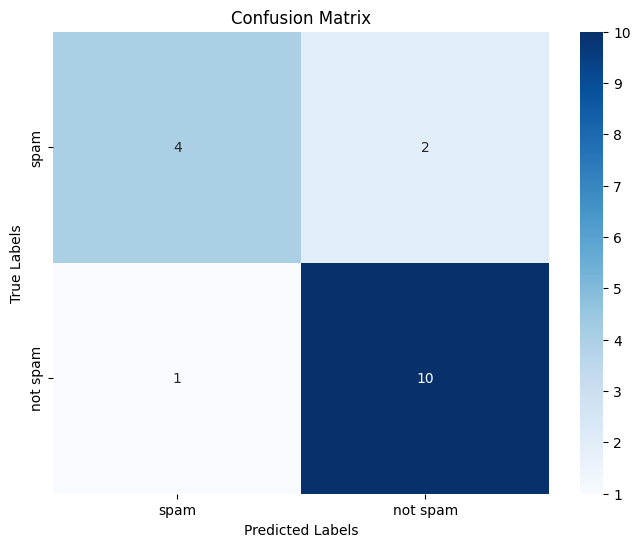

Classifier: VotingClassifier
Accuracy: 0.7058823529411765
Precision (spam): 1.0
Recall (spam): 0.16666666666666666
F1 Score (spam): 0.2857142857142857


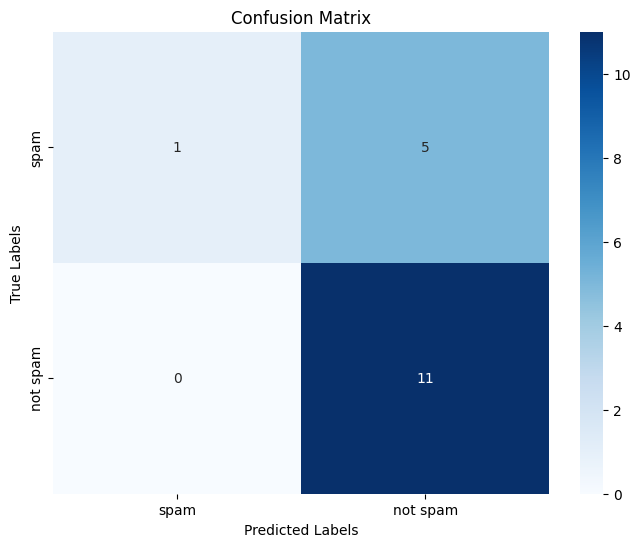

In [3]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['text'].values)
y = data['type'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers and ensembles
random_forest = RandomForestClassifier()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()
ensemble_classifier = VotingClassifier(estimators=[
    ('Random Forest', random_forest),
    ('SVM', svm),
    ('Gradient Boosting', gradient_boosting)
], voting='hard')

# Train each classifier and ensemble
classifiers = [random_forest, svm, gradient_boosting, ensemble_classifier]

for classifier in classifiers:
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label='spam')
    recall = recall_score(y_test, predictions, pos_label='spam')
    f1 = f1_score(y_test, predictions, pos_label='spam')

    # Print results for each classifier
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision (spam): {precision}")
    print(f"Recall (spam): {recall}")
    print(f"F1 Score (spam): {f1}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=['spam', 'not spam'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['spam', 'not spam'], yticklabels=['spam', 'not spam'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print("=" * 50)